In [106]:
import sys
import os

import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
import itertools

cwd = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(cwd, "..")))

from evaluation.prediction_reader import score_result

In [107]:
def multi_boxplot(data, xlabel, ylabel, xticks, labels, location, save_figure=None, ylim=None):
    
    # plt.rcParams.update({"font.size": 12, "font.family": "serif", "font.serif": ["NewComputerModern10"]})
    plt.rcParams.update({'font.size': 10})

    plt.figure(figsize=(6,3)) #(6,3) #(5, 2.5)

    # colour_scheme = ['lightblue', 'orange', 'mediumseagreen', 'orchid']
    colour_scheme = ['#52B297', '#8E4A93', '#009EE7', '#EF766E', '#B9DFD5', '#CCA0CF']

    # Set the width of each box
    box_width = 0.15


    for i in range(len(data)):
        boxprops = dict(linestyle='-', linewidth=1, color='black', facecolor=colour_scheme[i])
        medianprops = dict(linestyle='-', linewidth=1, color='black')
        meanprops = dict(linestyle='-', linewidth=1, color='none')

        plt.boxplot(data[i], positions=np.arange(len(data[i])) + i * box_width, widths=box_width, patch_artist=True,
                    boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops, label=labels[i])
        

    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 

    central_positions = np.arange(len(data[0])) + (len(data) * box_width / 2) - (box_width / 2)
    plt.xticks(central_positions, xticks)
    
    if ylim is not None:
        plt.ylim(-0.005, ylim)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if location is not None:
        if location == 'complex':
            plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.7), borderaxespad=0, frameon=False) # ncol=len(data)
        else:
            plt.legend(loc=location)

    if save_figure is not None:
        os.makedirs('figures', exist_ok=True)
        plt.savefig(f'figures/{save_figure}.pdf', format='pdf', bbox_inches='tight')

    
    plt.show()

In [108]:
def wilcoxon_test(vectors):
    n_models = len(vectors)
    model_names = [f"Model {i + 1}" for i in range(n_models)]
    pairs = list(itertools.combinations(range(n_models), 2))

    for i, j in pairs:
        stat, p = stats.wilcoxon(np.array(vectors[i]), np.array(vectors[j]))
        if p <= 0.05:
            print(f"{model_names[i]} vs {model_names[j]}: p-value={p:.4f}")

def ttest(vectors):
    n_models = len(vectors)
    model_names = [f"Model {i + 1}" for i in range(n_models)]
    pairs = list(itertools.combinations(range(n_models), 2))

    for i, j in pairs:
        stat, p = stats.ttest_rel(np.array(vectors[i]), np.array(vectors[j]))
        if p <= 0.05:
            print(f"{model_names[i]} vs {model_names[j]}: p-value={p:.4f}")


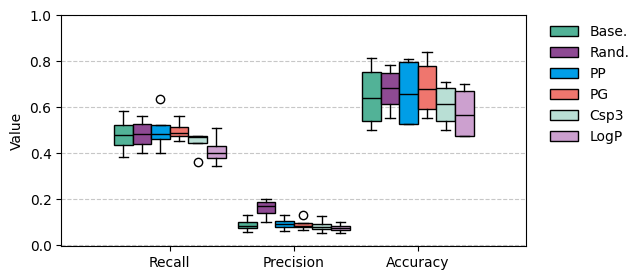

Recall:
Model 1 vs Model 6: p-value=0.0294
Model 2 vs Model 6: p-value=0.0131
Model 3 vs Model 6: p-value=0.0102
Model 4 vs Model 6: p-value=0.0063
Precision:
Model 1 vs Model 2: p-value=0.0062
Model 2 vs Model 3: p-value=0.0057
Model 2 vs Model 4: p-value=0.0146
Model 2 vs Model 5: p-value=0.0107
Model 2 vs Model 6: p-value=0.0069
Model 3 vs Model 6: p-value=0.0332
Model 4 vs Model 6: p-value=0.0381
Accuracy:
Model 2 vs Model 5: p-value=0.0322
Model 2 vs Model 6: p-value=0.0148
Model 3 vs Model 6: p-value=0.0229
Model 4 vs Model 6: p-value=0.0304


In [109]:
bs = 4

r_chemf_base_0, p_chemf_base_0, s1_chemf_base_0, _ = score_result('../evaluation/accio/result_chemf_base_0.csv', bs, False)
r_chemf_base_05, p_chemf_base_05, s1_chemf_base_05, _  = score_result('../evaluation/accio/result_chemf_base_05.csv', bs, False)
r_chemf_PP_0, p_chemf_PP_0, s1_chemf_PP_0, _  = score_result('../evaluation/accio/result_chemf_PP_0.csv', bs, False)
r_chemf_PG_0, p_chemf_PG_0, s1_chemf_PG_0, _  = score_result('../evaluation/accio/result_chemf_PG_0.csv', bs, False)
r_chemf_csp3_0, p_chemf_csp3_0, s1_chemf_csp3_0, _  = score_result('../evaluation/accio/result_chemf_csp3_0.csv', bs, False)
r_chemf_logp_0, p_chemf_logp_0, s1_chemf_logp_0, _  = score_result('../evaluation/accio/result_chemf_logp_0.csv', bs, False)

base_0 = [r_chemf_base_0[-2], p_chemf_base_0[-2], s1_chemf_base_0[-2]]
base_05 = [r_chemf_base_05[-2], p_chemf_base_05[-2], s1_chemf_base_05[-2]]
PP = [r_chemf_PP_0[-2], p_chemf_PP_0[-2], s1_chemf_PP_0[-2]]
PG = [r_chemf_PG_0[-2], p_chemf_PG_0[-2], s1_chemf_PG_0[-2]]
csp3 = [r_chemf_csp3_0[-2], p_chemf_csp3_0[-2], s1_chemf_csp3_0[-2]]
logp = [r_chemf_logp_0[-2], p_chemf_logp_0[-2], s1_chemf_logp_0[-2]]

xlabel = None
xticks = ['Recall', 'Precision', 'Accuracy'] # Top 10
labels = ['Base.', 'Rand.', 'PP', 'PG', 'Csp3', 'LogP']

ylabel = 'Value'
data = [base_0, base_05, PP, PG, csp3, logp]
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'complex', 'augmentation', 1)

r = [r_chemf_base_0[-2], r_chemf_base_05[-2], r_chemf_PP_0[-2], r_chemf_PG_0[-2], r_chemf_csp3_0[-2], r_chemf_logp_0[-2]]
p = [p_chemf_base_0[-2], p_chemf_base_05[-2], p_chemf_PP_0[-2], p_chemf_PG_0[-2], p_chemf_csp3_0[-2], p_chemf_logp_0[-2]]
s1 = [s1_chemf_base_0[-2], s1_chemf_base_05[-2], s1_chemf_PP_0[-2], s1_chemf_PG_0[-2], s1_chemf_csp3_0[-2], s1_chemf_logp_0[-2]]
print('Recall:')
ttest(r)
print('Precision:')
ttest(p)
# wilcoxon_test(p)
print('Accuracy:')
ttest(s1)

Top 10


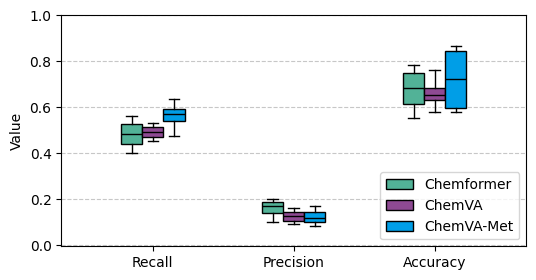

Top 3


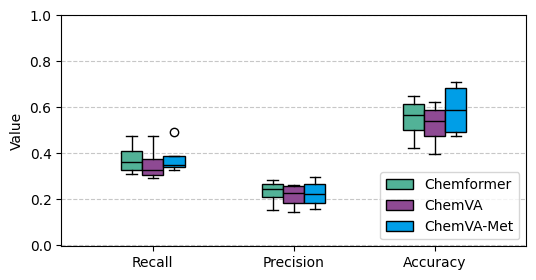

@ 10
Recall:
Model 1 vs Model 3: p-value=0.0162
Precision:
Model 1 vs Model 2: p-value=0.0193
Model 1 vs Model 3: p-value=0.0162
Accuracy:
@ 3
Recall:
Precision:
Accuracy:
Model 1 vs Model 2: p-value=0.0000


In [110]:
bs = 4

r_chemf_base_05, p_chemf_base_05, s1_chemf_base_05, _  = score_result('../evaluation/accio/result_chemf_base_05.csv', bs, False)
r_chemVA_base_05, p_chemVA_base_05, s1_chemVA_base_05, _  = score_result('../evaluation/accio/result_chemVA_base_05.csv', bs, False)
r_chemVAMet_base_05, p_chemVAMet_base_05, s1_chemVAMet_base_05, _ = score_result('../evaluation/accio/result_chemVA-Met_base_05.csv', bs, False)

chemf_val = [0.9552631578947368, 0.9671052631578947, 0.9644736842105263, 0.9783783783783784]
chemVA_val = [0.9552631578947368, 0.95, 0.9355263157894737, 0.977027027027027]
chemVAMet_val = [0.9736842105263158, 0.968421052631579, 0.9605263157894737, 0.972972972972973]


chemf = [r_chemf_base_05[-2], p_chemf_base_05[-2], s1_chemf_base_05[-2]]
chemVA = [r_chemVA_base_05[-2], p_chemVA_base_05[-2], s1_chemVA_base_05[-2]]
chemVAMet = [r_chemVAMet_base_05[-2], p_chemVAMet_base_05[-2], s1_chemVAMet_base_05[-2]]


xlabel = None
xticks = ['Recall', 'Precision', 'Accuracy']
labels = ['Chemformer', 'ChemVA', 'ChemVA-Met']

ylabel = 'Value'
data = [chemf, chemVA, chemVAMet]
print("Top 10")
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'lower right', 'pre-training_10', 1)

chemf = [r_chemf_base_05[1], p_chemf_base_05[1], s1_chemf_base_05[1]]
chemVA = [r_chemVA_base_05[1], p_chemVA_base_05[1], s1_chemVA_base_05[1]]
chemVAMet = [r_chemVAMet_base_05[1], p_chemVAMet_base_05[1], s1_chemVAMet_base_05[1]]


xlabel = None
xticks = ['Recall', 'Precision', 'Accuracy']
labels = ['Chemformer', 'ChemVA', 'ChemVA-Met']

ylabel = 'Value'
data = [chemf, chemVA, chemVAMet]
print("Top 3")
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'lower right', 'pre-training_3', 1)

r = [r_chemf_base_05[-2], r_chemVA_base_05[-2], r_chemVAMet_base_05[-2]]
p = [p_chemf_base_05[-2], p_chemVA_base_05[-2], p_chemVAMet_base_05[-2]]
s1 = [s1_chemf_base_05[-2], s1_chemVA_base_05[-2], s1_chemVAMet_base_05[-2]]

print('@ 10')
print('Recall:')
ttest(r)
print('Precision:')
ttest(p)
print('Accuracy:')
ttest(s1)

r = [r_chemf_base_05[1], r_chemVA_base_05[1], r_chemVAMet_base_05[1]]
p = [p_chemf_base_05[1], p_chemVA_base_05[1], p_chemVAMet_base_05[1]]
s1 = [s1_chemf_base_05[1], s1_chemVA_base_05[1], s1_chemVAMet_base_05[1]]

print('@ 3')
print('Recall:')
ttest(r)
print('Precision:')
ttest(p)
print('Accuracy:')
ttest(s1)

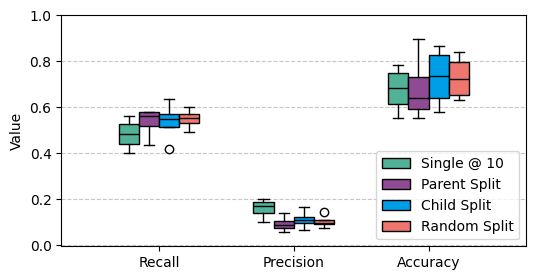

Recall:
Precision:
Model 1 vs Model 2: p-value=0.0420
Model 2 vs Model 3: p-value=0.0308
Accuracy:


In [111]:
bs = 4

r_chemVAMet_base_05, p_chemVAMet_base_05, s1_chemVAMet_base_05, _ = score_result('../evaluation/accio/result_chemVA-Met_base_05.csv', bs, False) 
r_ensemble_parent, p_ensemble_parent, s1_ensemble_parent, _ = score_result('../evaluation/accio/chemVA-Met_ensemble_parent_4_per_model.csv', bs, False)
r_ensemble_child, p_ensemble_child, s1_ensemble_child, _  = score_result('../evaluation/accio/chemVA-Met_ensemble_child_3_per_model.csv', bs, False)
r_ensemble_random, p_ensemble_random, s1_ensemble_random, _  = score_result('../evaluation/accio/chemVA-Met_ensemble_random_5_per_model.csv', bs, False)

base_05 = [r_chemf_base_05[-2], p_chemf_base_05[-2], s1_chemf_base_05[-2]]
ens_p = [r_ensemble_parent[-1], p_ensemble_parent[-1], s1_ensemble_parent[-1]]
ens_c = [r_ensemble_child[-1], p_ensemble_child[-1], s1_ensemble_child[-1]]
ens_r = [r_ensemble_random[-1], p_ensemble_random[-1], s1_ensemble_random[-1]]

xlabel = None
xticks = ['Recall', 'Precision', 'Accuracy']
labels = ['Single @ 10', 'Parent Split', 'Child Split', 'Random Split']

ylabel = 'Value'
data = [base_05, ens_p, ens_c, ens_r]
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'lower right', 'ensemble', 1)

r = [r_chemVAMet_base_05[-2], r_ensemble_parent[-1], r_ensemble_child[-1], r_ensemble_random[-1]]
p = [p_chemVAMet_base_05[-2], p_ensemble_parent[-1], p_ensemble_child[-1], p_ensemble_random[-1]]
s1 = [s1_chemVAMet_base_05[-2], s1_ensemble_parent[-1], s1_ensemble_child[-1], s1_ensemble_random[-1]]
print('Recall:')
ttest(r)
print('Precision:')
ttest(p)
print('Accuracy:')
ttest(s1)